# Tutorial Content

This notebook will walk you through steps to read in and organize velocity data in a raster format using xarray and rioxarray tools

First, lets install the python libraries that were listed on the [Software](software.ipynb) page:

In [48]:
import geopandas as gpd
import os
import numpy as np
import xarray as xr
import rioxarray as rxr
import matplotlib.pyplot as plt
from geocube.api.core import make_geocube
import xarray as xr
import numpy as np
import pandas as pd
import packaging
import pyproj

In [2]:
gen_path = '/Users/emmamarshall/Desktop/phd_research/siparcs/'

In [23]:
#data
itslive = rxr.open_rasterio('/Users/emmamarshall/Desktop/phd_research/siparcs/HMA_G0120_0000.nc').squeeze()


In [61]:
itslive.v


<xarray.DataArray 'v' (y: 15904, x: 23440)>
[372789760 values with dtype=float32]
Coordinates:
  * y               (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x               (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    band            int64 1
    UTM_Projection  int64 0
Attributes:
    map_scale_corrected:  1
    missing_value:        -32767
    quality_cutoff:       7
    standard_name:        velocity
    units:                m/y
    _FillValue:           -32767.0
    scale_factor:         1.0
    add_offset:           0.0

In [45]:
itslive.rio.crs.from_wkt

<bound method CRS.from_wkt of <class 'rasterio.crs.CRS'>>

In [55]:
type(itslive)
itslive.rio.crs

CRS.from_wkt('PROJCS["Asia_North_Lambert_Conformal_Conic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["false_easting",0],PARAMETER["false_northing",0],PARAMETER["central_meridian",95],PARAMETER["standard_parallel_1",15],PARAMETER["standard_parallel_2",65],PARAMETER["latitude_of_origin",30],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","102027"]]')

In [39]:
#read in vector data 
se_asia = gpd.read_file('/Users/emmamarshall/Downloads/15rgi60SouthAsiaEast/15_rgi60_SouthAsiaEast.shp')
#sw_asia = gpd.read_file('/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/sw_asia_1km.shp')
#c_asia = gpd.read_file('/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/central_asia_1km.shp') 

#se_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/se_asia_1km.shp'
#sw_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/sw_asia_1km.shp'
#c_asia_path = '/Users/emmamarshall/Desktop/phd_research/nisar_prepwork/rgi_1km/central_asia_1km.shp'




In [58]:
se_asia_prj = se_asia.to_crs('+proj=lcc +lat_1=15 +lat_2=65 +lat_0=30 +lon_0=95 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m no_defs'
                             )

<AxesSubplot:>

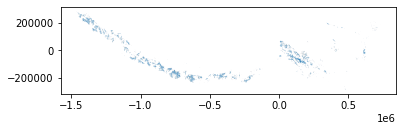

In [60]:
se_asia_prj.plot()

<AxesSubplot:title={'center':'band = 1, UTM_Projection = 0'}, xlabel='x coordinate of projection [m]', ylabel='y coordinate of projection [m]'>

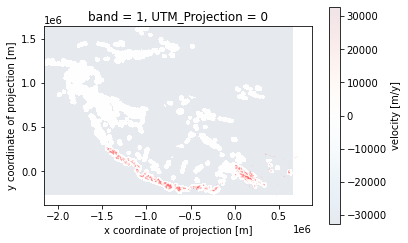

In [63]:
fig, ax = plt.subplots()

itslive.v.plot.imshow(ax=ax, alpha = 0.1)
se_asia_prj.plot(ax=ax, color='red')


In [82]:
se_asia_prj['Unique_ID'] = se_asia_prj.index.astype(int)
se_asia_prj

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry,Integer_ID,Unique_ID
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,0,0,0,0,9,9,None,"POLYGON ((626747.322 19334.286, 626747.214 193...",0,0
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,0,0,0,0,9,9,None,"POLYGON ((626699.144 24673.098, 626701.110 246...",1,1
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,0,0,0,0,9,9,None,"POLYGON ((626205.858 25396.784, 626210.489 254...",2,2
3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,0.985,4622,...,0,0,0,0,9,9,None,"POLYGON ((627054.150 21582.052, 627057.905 216...",3,3
4,RGI60-15.00005,G102044E30025N,19990920,-9999999,102.043728,30.025101,15,3,0.465,4733,...,0,0,0,0,9,9,None,"POLYGON ((626913.162 28267.766, 626895.820 282...",4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,RGI60-15.13115,G081977E30337N,20090918,-9999999,81.977000,30.337000,15,1,1.356,5480,...,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1150121.533 121963.660, -1150118.27...",13114,13114
13115,RGI60-15.13116,G081991E30339N,20090918,-9999999,81.991000,30.339000,15,1,7.427,5266,...,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((-1148353.222 121707.808, -1148328.34...",13115,13115
13116,RGI60-15.13117,G081355E30440N,20070912,-9999999,81.355000,30.440000,15,1,6.788,5696,...,0,0,0,0,9,9,CN5Z342B0006,"POLYGON ((-1204224.276 142125.331, -1204220.83...",13116,13116
13117,RGI60-15.13118,G081361E30451N,20070912,-9999999,81.361000,30.451000,15,1,0.043,5969,...,0,0,0,0,9,9,None,"POLYGON ((-1202593.561 141849.818, -1202579.07...",13117,13117


In [66]:
def rasterize_vector(gpdf_prj, raster_obj):  #for now, project objects outside of fn
    
    #use index as a unique key for each glacier
    gpdf_prj['Integer_ID'] = gpdf_prj.index.astype(int)
    #print(gpdf_utm['Integer_ID'])
    
    #rasterize glacier vector by unique id 

    out_grid = make_geocube(
            vector_data = gpdf_prj,
            measurements = ['Integer_ID'],
            like = raster_obj['v'] #need to specify a var here, not sure best way to do that
            )
    
    #now merge the rasterized vector and the original raster togehter into a geocube
    out_grid['speed'] = (raster_obj.dims, raster_obj.v.values, raster_obj.attrs, raster_obj.encoding)
    
    #now, get velocity statistics of each 'region' (integer) using the mask
    #grouped_ID = out_grid.drop('spatial_ref').groupby(out_grid.Integer_ID)

    #compute zonal stats groupedd by ID
    #grid_mean_sp = grouped_ID.mean().rename({'speed': 'speed_mean'})
    #grid_min_sp = grouped_ID.min().rename({'speed': 'speed_min'})
    #grid_max_sp = grouped_ID.max().rename({'speed': 'speed_max'})
    #grid_std_sp = grouped_ID.max().rename({'speed': 'speed_std'})
    
    #merge each zonal stat xr obj into a single xr obj, convert to pandas df
    #zonal_stats = xr.merge([grid_mean_sp, grid_min_sp, grid_max_sp, grid_std_sp]).to_dataframe()
    #zonal_stats = zonal_stats.reset_index()
    
   # return zonal_stats
    return out_grid

In [67]:
rasterize_vector_seasia = rasterize_vector(se_asia_prj, itslive)


<xarray.Dataset>
Dimensions:      (y: 15904, x: 23440)
Coordinates:
  * y            (y) float64 1.643e+06 1.643e+06 ... -2.648e+05 -2.649e+05
  * x            (x) float64 -2.16e+06 -2.16e+06 ... 6.526e+05 6.527e+05
    spatial_ref  int64 0
Data variables:
    Integer_ID   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    speed        (y, x) float32 -3.277e+04 -3.277e+04 ... -3.277e+04 -3.277e+04

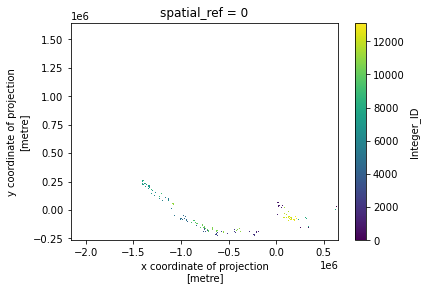

In [83]:
rasterize_vector_seasia.Integer_ID.plot.imshow()

In [23]:
#rasterize_vector_seasia_100.plot.scatter(x='Integer_ID', y='speed',c='darkblue')
se_asia

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
0,RGI60-15.00001,G102044E29941N,19990920,-9999999,102.044042,29.941000,15,3,0.438,4996,...,251,850,0,0,0,0,9,9,None,"POLYGON ((102.03759 29.93828, 102.03759 29.938..."
1,RGI60-15.00002,G102042E29987N,19990920,-9999999,102.042346,29.987019,15,3,0.644,4947,...,244,1021,0,0,0,0,9,9,None,"POLYGON ((102.04195 29.99030, 102.04197 29.990..."
2,RGI60-15.00003,G102041E29997N,19990920,-9999999,102.041130,29.997311,15,3,0.225,5019,...,274,812,0,0,0,0,9,9,None,"POLYGON ((102.03710 29.99774, 102.03719 29.998..."
3,RGI60-15.00004,G102050E29962N,19990920,-9999999,102.050283,29.962297,15,3,0.985,4622,...,52,2318,0,0,0,0,9,9,None,"POLYGON ((102.04309 29.95992, 102.04315 29.960..."
4,RGI60-15.00005,G102044E30025N,19990920,-9999999,102.043728,30.025101,15,3,0.465,4733,...,20,913,0,0,0,0,9,9,None,"POLYGON ((102.04765 30.02514, 102.04741 30.024..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,RGI60-15.13115,G081977E30337N,20090918,-9999999,81.977000,30.337000,15,1,1.356,5480,...,352,1856,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((81.98085 30.33985, 81.98095 30.33949..."
13115,RGI60-15.13116,G081991E30339N,20090918,-9999999,81.991000,30.339000,15,1,7.427,5266,...,330,5779,0,0,0,0,9,9,CN5Z342A0003,"POLYGON ((82.00100 30.33999, 82.00129 30.33994..."
13116,RGI60-15.13117,G081355E30440N,20070912,-9999999,81.355000,30.440000,15,1,6.788,5696,...,96,5519,0,0,0,0,9,9,CN5Z342B0006,"POLYGON ((81.34247 30.45299, 81.34257 30.45268..."
13117,RGI60-15.13118,G081361E30451N,20070912,-9999999,81.361000,30.451000,15,1,0.043,5969,...,206,527,0,0,0,0,9,9,None,"POLYGON ((81.36115 30.45285, 81.36129 30.45300..."


<AxesSubplot:xlabel='Integer_ID', ylabel='Area'>

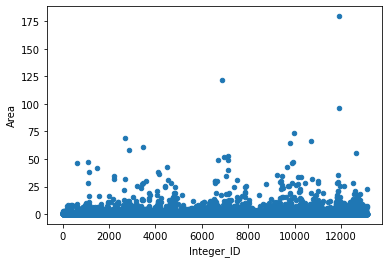

In [24]:
#project to utm
se_asia_utm = se_asia.to_crs('EPSG:32645')
#make a col in df that is a unique integer ID (from index) for each glacier
se_asia_utm['Integer_ID'] = se_asia_utm.index.astype(int)
#double checking that all glaciers are assigned an ID
se_asia_utm.plot.scatter(x='Integer_ID', y='Area')

In [25]:
#rasterize glacier vector by unique id 
#
out_grid_se_asia = make_geocube(
            vector_data = se_asia_utm,
            measurements = ['Integer_ID'],
            like = ds_45n['sp']
)

In [26]:
#now merge the rasterized vector and the original raster togehter into a geocube
out_grid_se_asia['speed'] = (ds_45n.dims, ds_45n.sp.values, ds_45n.attrs, ds_45n.encoding)
out_grid_se_asia

<xarray.Dataset>
Dimensions:      (y: 27072, x: 4440)
Coordinates:
  * y            (y) float64 6.297e+06 6.297e+06 ... -1.993e+05 -1.996e+05
  * x            (x) float64 -3.253e+04 -3.229e+04 ... 1.033e+06 1.033e+06
    spatial_ref  int64 0
Data variables:
    Integer_ID   (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    speed        (x, y) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan

In [27]:
#trying to figure out why 1300 glaciers or so get dropped
print(len(out_grid_se_asia.Integer_ID))

27072


In [28]:
#now, get velocity statistics of each 'region' (integer) using the mask
grouped_ID = out_grid_se_asia.drop('spatial_ref').groupby(out_grid_se_asia.Integer_ID)
grouped_ID

DatasetGroupBy, grouped over 'Integer_ID'
6120 groups with labels 1.636e+03, ..., 1.312e+04.

In [29]:
grid_mean_sp = grouped_ID.mean().rename({'speed': 'speed_mean'})
grid_median_sp = grouped_ID.median().rename({'speed': 'speed_median'})
grid_min_sp = grouped_ID.min().rename({'speed': 'speed_min'})
grid_max_sp = grouped_ID.max().rename({'speed': 'speed_max'})
grid_std_sp = grouped_ID.max().rename({'speed': 'speed_std'})

In [30]:
zonal_stats = xr.merge([grid_mean_sp, grid_median_sp, grid_min_sp, grid_max_sp, grid_std_sp]).to_dataframe()
zonal_stats = zonal_stats.reset_index()
zonal_stats

,Integer_ID,speed_mean,spatial_ref,speed_median,speed_min,speed_max,speed_std
0,1636.0,14.529323,0,4.284127,0.268140,85.758003,85.758003
1,1637.0,0.493714,0,0.493714,0.493714,0.493714,0.493714
2,1638.0,0.780032,0,0.621207,0.554590,1.323123,1.323123
3,1639.0,0.621363,0,0.648885,0.250643,1.144318,1.144318
4,1640.0,1.913044,0,1.913044,1.651045,2.175043,2.175043
...,...,...,...,...,...,...,...
6115,11020.0,0.272500,0,0.272500,0.272500,0.272500,0.272500
6116,11021.0,0.807759,0,0.611025,0.157515,2.715099,2.715099
6117,11022.0,0.718966,0,0.678837,0.281665,1.389893,1.389893
6118,13114.0,0.854855,0,0.733067,0.222202,2.046064,2.046064


In [31]:
#now, trying to merge zonal stats df back with original glacier df on integer_ID col
se_asia_glacier_data = se_asia_utm.merge(zonal_stats, on='Integer_ID')


<AxesSubplot:xlabel='Integer_ID', ylabel='speed_mean'>

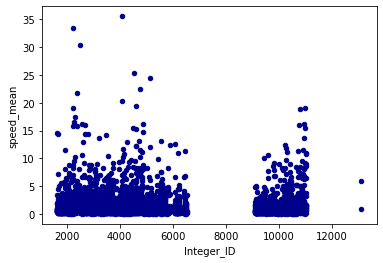

In [32]:
zonal_stats['speed_mean']

fig, ax = plt.subplots()
se_asia_glacier_data.plot.scatter(x='Integer_ID',y = 'speed_mean', c = 'darkblue', ax=ax)


In [33]:
zonal_stats['speed_mean'].min()

0.014607632

<AxesSubplot:>

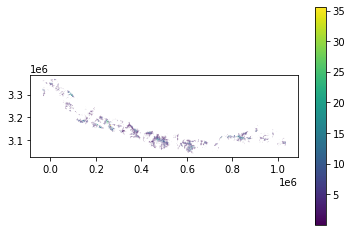

In [34]:
se_asia_glacier_data.plot(column='speed_mean', legend=True)